# Evaluación modelos de Machine Learning

## Importar Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

En este ejercicio pretendo hacer la comparación de 3 modelos de clasificación:

- Árbol de Decisión como Clasificador
- Bosque Aleatorio de Clasificación
- K-Vecinos


In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, confusion_matrix, mean_absolute_error, r2_score

In [4]:
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [5]:
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

## Importar la data

In [6]:
iris = pd.read_csv("Datasets/IRIS.csv")

## Iris Data

### Conocer la data

In [7]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### Graficar la data

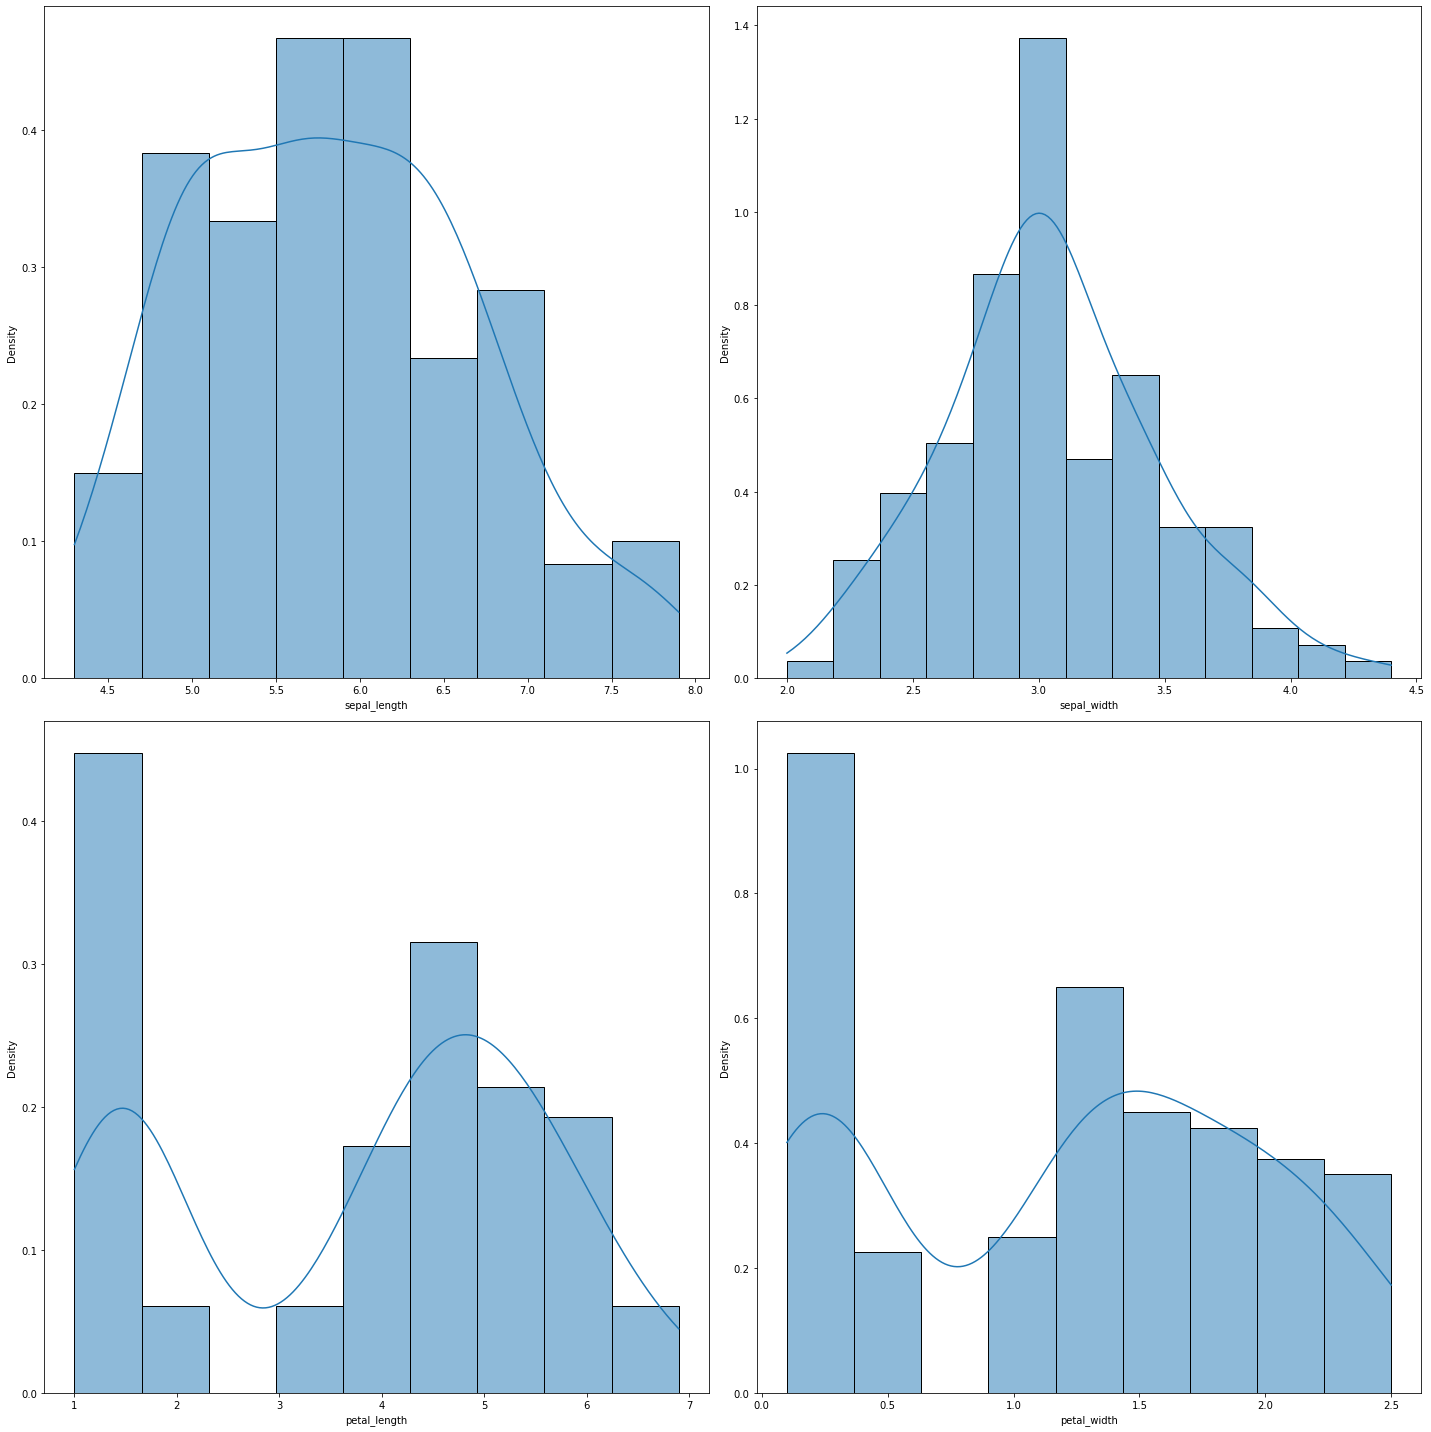

In [11]:
rows = 2
cols = 2

fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(20, 20))

col = iris.columns[:-1]
index = 0

for i in range(rows):
    for j in range(cols):
        sns.histplot(iris[col[index]], ax=ax[i][j], kde=True, stat='density')
        index += 1

plt.tight_layout()

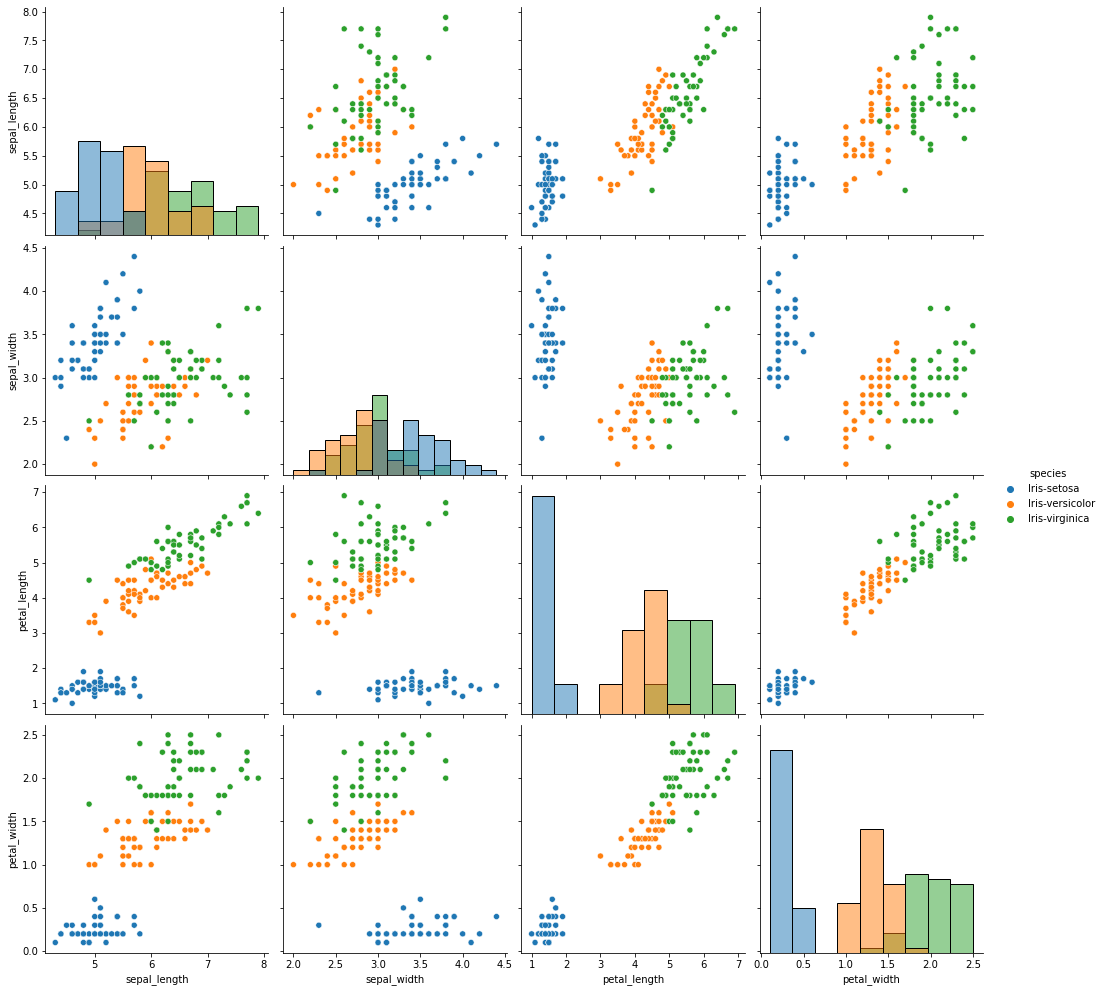

In [12]:
sns.pairplot(iris, diag_kind='hist', height=3.5, hue='species')

En esta gráfica podemos observar los diversos grupos de las flores, según la leyenda asignada en el diagrama. En cada caracteristica, las flores forman grupos que se pueden distinguir facilmente de las otras, haciendo que cada flor tenga un conjunto de caracteristicas particulares.

In [13]:
iris['species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: species, dtype: int64

<AxesSubplot:xlabel='species', ylabel='Density'>

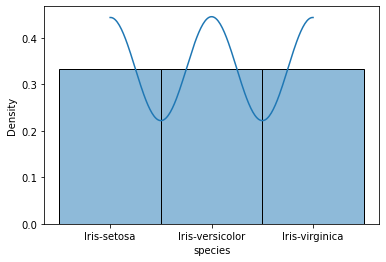

In [14]:
sns.histplot(iris['species'], kde=True, stat='density')

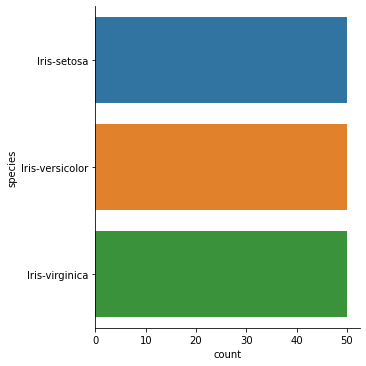

In [15]:
sns.catplot(y='species', data=iris, kind='count')

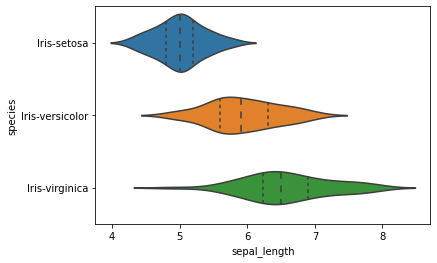

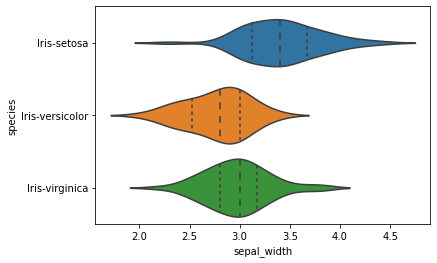

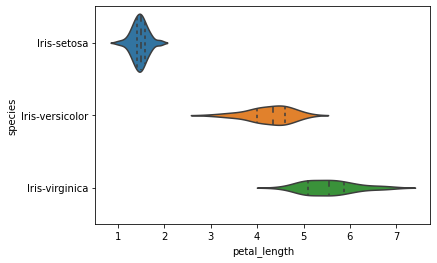

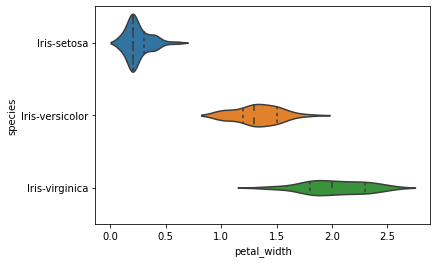

In [16]:
g = sns.violinplot(y='species', x='sepal_length', data=iris, inner='quartile')
plt.show()
g = sns.violinplot(y='species', x='sepal_width', data=iris, inner='quartile')
plt.show()
g = sns.violinplot(y='species', x='petal_length', data=iris, inner='quartile')
plt.show()
g = sns.violinplot(y='species', x='petal_width', data=iris, inner='quartile')
plt.show()

### Convertir de dato categorico a númerico

In [17]:
iris['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [18]:
species = {
    'Iris-setosa': 0,
    'Iris-versicolor': 1,
    'Iris-virginica': 2
}

iris['species'] = iris['species'].map(species)

In [19]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


### Separar la data

In [20]:
x = iris.drop(columns='species')
y = iris['species']

x_train,x_test, y_train,y_test= train_test_split(x, y, test_size=0.2, random_state=45)

### Establecer un modelo de Machine Learning

#### Conocer los datos con la mejor correlación

<AxesSubplot:>

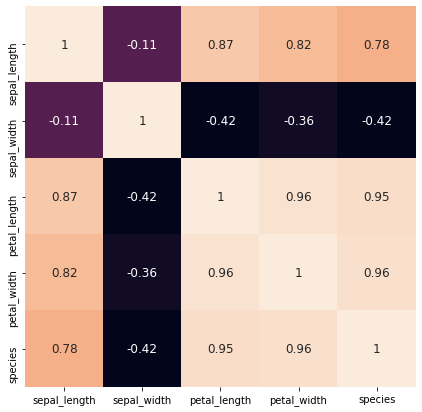

In [21]:
corrmat = iris.corr()
fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(corrmat, annot=True, annot_kws={'size': 12}, cbar=False)

La matriz de correlación, nos permite observar cuales datos tienen más relación con respecto a la columna objetivo. Los valores positivos son una relación directa (x aumenta mientras y aumenta), mientras los valores negativos presentan una correlación inversa (x aumenta mientras y disminuye).

In [22]:
def getCorrelatedFeature(corrdata, threshold):
    feature = []
    value = []

    for i, index in enumerate(corrdata.index):
        if abs(corrdata[index]) > threshold:
            feature.append(index)
            value.append(corrdata[index])   
    df = pd.DataFrame(data=value, index=feature, columns=['Corr Value'])
    return df

In [23]:
threshold = 0.90
corr_value = getCorrelatedFeature(corrmat['species'], threshold)
corr_value

,Corr Value
petal_length,0.949043
petal_width,0.956464
species,1.000000


La variable que presenta el mayor puntaje de correlación con la caracteristica objetivo, es la columna de `petal_width`.

#### Modelo de Decision Tree Classifier

##### Método del Codo

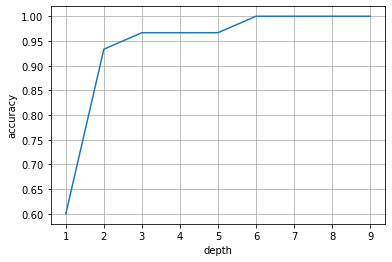

In [24]:
max_depth_lista = list(range(1, 10))

accuracy = []

for depth in max_depth_lista:
    arbol_clas = DecisionTreeClassifier(max_depth=depth, random_state=0)
    arbol_clas.fit(x_train, y_train)
    score = arbol_clas.score(x_test, y_test)
    accuracy.append(score)

plt.plot(max_depth_lista, accuracy)
plt.ylabel('accuracy')
plt.xlabel('depth')
plt.grid(True)
plt.show()


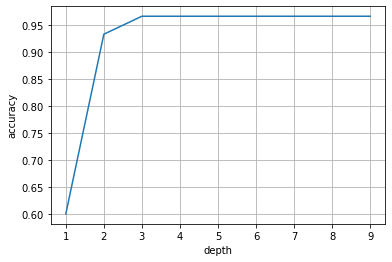

In [25]:
max_depth_lista = list(range(1, 10))

accuracy = []

for depth in max_depth_lista:
    arbol_clas = DecisionTreeClassifier(max_depth=depth, random_state=42)
    arbol_clas.fit(x_train, y_train)
    score = arbol_clas.score(x_test, y_test)
    accuracy.append(score)

plt.plot(max_depth_lista, accuracy)
plt.ylabel('accuracy')
plt.xlabel('depth')
plt.grid(True)
plt.show()


##### Opción más optima

Luego de analizar la gráfica del método del codo, se toma una profundida para nuestro árbol de 3 y un random_state de 42. Este último parametro se toma como medida para evitar un dataset sesgado o amañado y evitar obtener una precisión en la predicción del 100%, lo cual puede ser incorrecto.

In [26]:
dtc = DecisionTreeClassifier(max_depth=3, random_state=42)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [27]:
y_pred = dtc.predict(x_test)

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.88      1.00      0.93         7
           2       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [29]:
print('Test score: ', dtc.score(x_test, y_test) * 100)

Test score:  96.66666666666667


In [30]:
print('Training score: ', dtc.score(x_train, y_train) * 100)

Training score:  97.5


In [31]:
print('Mean absolute error', mean_absolute_error(y_test, y_pred))

Mean absolute error 0.03333333333333333


In [32]:
print('Porcentaje de Acertabilidad', str(accuracy_score(y_test, y_pred)*100))

Porcentaje de Acertabilidad 96.66666666666667


##### Score de predicción

In [33]:
print("Score predict train", r2_score(y_train, dtc.predict(x_train)))
print("Score predict test", r2_score(y_test, dtc.predict(x_test)))

Score predict train 0.9610347440199156
Score predict test 0.9564586357039188


##### Matriz de confusión

In [34]:
print(confusion_matrix(y_test, y_pred))

[[11  0  0]
 [ 0  7  0]
 [ 0  1 11]]


In [35]:
y_test.count()

30

Text(0.5, 1.0, 'Relative ratios between actual class and predicted class')

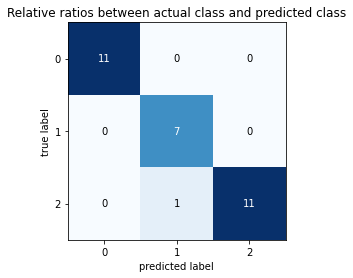

In [36]:
cm = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.title('Relative ratios between actual class and predicted class')

De los 30 valores destinados para la predicción, 29 son correctos y solo 1 es clasificado de manera erronea (Valor real: label-1, Valor predicho: label-2)

##### Gráfica del árbol de decisión

In [37]:
class_names_list = list(['setosa', 'versicolor', 'virginica'])

dot_data = export_graphviz(dtc, feature_names=iris.columns[:-1].values, class_names=class_names_list)
graph = graph_from_dot_data(dot_data)
graph.write_png('../Z-IMG/PC/tree_iris.png')

True

Podemos observar una gráfica de las ramas que toma nuestro árbol de clasificación, con las caracteristicas que toma en cuenta para su labor.

![tree](../Z-IMG/PC/tree_iris.png)

#### Modelo de Random Forest Classifier

In [38]:
rfc = RandomForestClassifier(n_estimators=100, random_state=0)
rfc.fit(x_train, y_train)
pred = rfc.predict(x_test)

In [39]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.78      1.00      0.88         7
           2       1.00      0.83      0.91        12

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



In [40]:
print('Test score: ', rfc.score(x_test, y_test) * 100)

Test score:  93.33333333333333


In [41]:
print('Training score: ', rfc.score(x_train, y_train) * 100)

Training score:  100.0


In [42]:
print('Porcentaje de Acertabilidad', str(accuracy_score(y_test, pred)*100))

Porcentaje de Acertabilidad 93.33333333333333


##### Matriz de confusión

Text(0.5, 1.0, 'Relative ratios between actual class and predicted class')

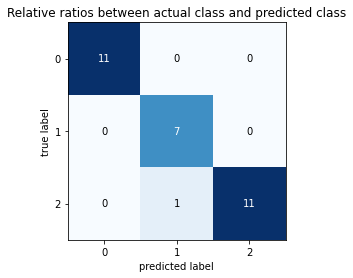

In [43]:
cm = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.title('Relative ratios between actual class and predicted class')

De nueva cuenta, solo se predice un valor de manera incorrecta.

##### Score de predicción

In [44]:
print("Score predict train", r2_score(y_train, rfc.predict(x_train)))
print("Score predict test", r2_score(y_test, rfc.predict(x_test)))

Score predict train 1.0
Score predict test 0.9129172714078374


#### Modelo K-Neighbors Classifier

##### Método del codo

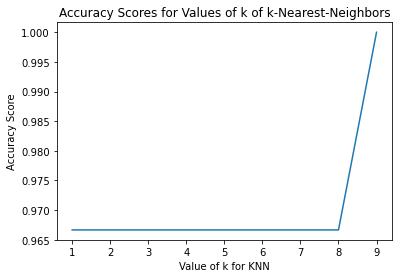

In [48]:
k_range = list(range(1,10))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

##### Opción más óptima

In [49]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [55]:
print('Test score: ', knn.score(x_test, y_test) * 100)

Test score:  100.0


In [56]:
print('Training score: ', knn.score(x_train, y_train) * 100)

Training score:  96.66666666666667


In [53]:
print('Mean absolute error', mean_absolute_error(y_test, y_pred))

Mean absolute error 0.0


In [54]:
print('Porcentaje de Acertabilidad', str(accuracy_score(y_test, y_pred)*100))

Porcentaje de Acertabilidad 100.0


##### Score de predicción

In [57]:
print("Score predict train", r2_score(y_train, knn.predict(x_train)))
print("Score predict test", r2_score(y_test, knn.predict(x_test)))

Score predict train 0.9480463253598874
Score predict test 1.0


##### Matrix de Confusión

Text(0.5, 1.0, 'Relative ratios between actual class and predicted class')

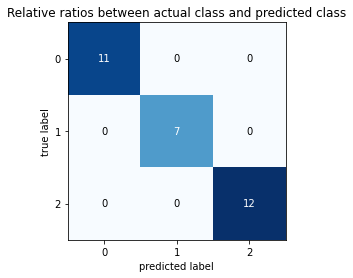

In [58]:
cm = confusion_matrix(y_test, y_pred)
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.title('Relative ratios between actual class and predicted class')

## Conclusión

El mejor modelo de clasificación de los 3 empleados, fue el modelo de KNN, el cual obtuvo un porcentaje de acierto de 100%. Los puntajes de acierto frente train y test fueron los siguientes:

|Model|Score Train|Score Test|
|-----|-----------|----------|
|Árbol de Decisión Clasificador|0.961|0.965|
|Random Forest Clasificador|1.0|0.912|
|k-Neighbors Clasificador|0.948|1.0|

Como se puede ver, el mejor modelo para predecir a partir de los datos de train es el modelo de Random Forest Clasificador, y para los datos de test, el modelo de KNN Clasificador.


In [59]:
import statsmodels.api as sm

X_sm = sm.add_constant(x)
olm = sm.OLS(y, X_sm)                                   
olm = olm.fit()
olm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                species   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     484.8
Date:                Thu, 16 Sep 2021   Prob (F-statistic):           8.21e-83
Time:                        19:06:47   Log-Likelihood:                 17.468
No. Observations:                 150   AIC:                            -24.94
Df Residuals:                     145   BIC:                            -9.882
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1921      0.205      0.938      0.350      -0.212       0.597
sepal_length    -0.1097      0.058     -1.900      0.059      -0.224       0.004
sepal_width     -0.0442      0.060     -0.738      0.462      -0.163       0.074
petal_length     0.2270      0.057      3.983      0.000       0.114       0.340
petal_width      0.6099      0.094      6.456      0.000       0.423       0.797
==============================================================================
Omnibus:                        0.366   Durbin-Watson:                   1.068
Prob(Omnibus):                  0.833   Jarque-Bera (JB):                0.138
Skew:                          -0.052   Prob(JB):                        0.933
Kurtosis:                       3.106   Cond. No.                         91.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""